In [170]:
import pandas as pd
import numpy as np
# Load the diabetes.csv
df = pd.read_csv("/content/drive/MyDrive/Dataset/diabetes_.csv");



In [171]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [172]:
#counting the zero values.
zero_counts = (df == 0).sum()
print(zero_counts)


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [173]:
mean_median = df.agg(['mean', 'median'])
print(mean_median)


        Pregnancies     Glucose  BloodPressure  SkinThickness    Insulin  \
mean       3.845052  120.894531      69.105469      20.536458  79.799479   
median     3.000000  117.000000      72.000000      23.000000  30.500000   

              BMI  DiabetesPedigreeFunction        Age   Outcome  
mean    31.992578                  0.471876  33.240885  0.348958  
median  32.000000                  0.372500  29.000000  0.000000  


In [174]:
#ther is  few difference in mean and median so the data have some outliar so best replacement for 0 is meadian value of corrosponding column.
# 0 is replaced in colum where it mattered eg. insulin cant be 0 bloodpressure cant be 0.
cols_to_fill = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols_to_fill:
    median_value = df[col].median()
    df[col] = df[col].replace(0, median_value)


In [175]:
#raplaced zeros in columns 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age with theri median value.
zero_counts = (df == 0).sum()
print(zero_counts)


Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [176]:
# Separate the feature matrix (X) and target variable (y).
# Perform a train - test split from scratch using a 70% − 30% ratio

X = df.drop(columns=["Outcome"]).values
y = df["Outcome"].values

# Define a function for train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
  """
  Splits dataset into train and test sets.
  Arguments:
  X : np.ndarray
  Feature matrix.
  y : np.ndarray
  Target array.
  test_size : float
  Proportion of the dataset to include in the test split (0 < test_size < 1).
  random_seed : int
  Seed for reproducibility.
  Returns:
  X_train, X_test, y_train, y_test : np.ndarray
  Training and testing splits of features and target.

  """
  np.random.seed(random_seed)
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices) # Shuffle the indices
  test_split_size = int(len(X) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]
  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]
  return X_train, X_test, y_train, y_test
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)
# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


In [177]:
def euclidean_distance(point1, point2):
  """
  Calculate the Euclidean distance between two points in n-dimensional space.
  Arguments:
  point1 : np.ndarray
  The first point as a numpy array.
  point2 : np.ndarray
  The second point as a numpy array.
  Returns:
  float
  The Euclidean distance between the two points.
  Raises:
  ValueError: If the input points do not have the same dimensionality.
  """
  # Check if the points are of the same dimension
  if point1.shape != point2.shape:
    raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
  # Calculate the Euclidean distance
  distance = np.sqrt(np.sum((point1 - point2) ** 2))
  return distance

In [178]:
# Function for KNN prediction for a single query
def knn_predict_single(query, X_train, y_train, k=3):
  """
  Predict the class label for a single query using the K-nearest neighbors algorithm.
  Arguments:
  query : np.ndarray
  The query point for which the prediction is to be made.
  X_train : np.ndarray
  The training feature matrix.
  y_train : np.ndarray
  The training labels.
  k : int, optional
  The number of nearest neighbors to consider (default is 3).
  Returns:
  int
  The predicted class label for the query.
  """
  distances = [euclidean_distance(query, x) for x in X_train]
  sorted_indices = np.argsort(distances)
  nearest_indices = sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction



In [179]:
# Function to test KNN for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
  """
  Predict the class labels for all test samples using the K-nearest neighbors algorithm.
  Arguments:
  X_test : np.ndarray
  The test feature matrix.
  X_train : np.ndarray
  The training feature matrix.
  y_train : np.ndarray
  The training labels.
  k : int, optional
  The number of nearest neighbors to consider (default is 3).
  Returns:
  np.ndarray
  An array of predicted class labels for the test samples.
  """
  predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
  return np.array(predictions)



In [180]:
predicted_value= knn_predict(X_test, X_train, y_train, k=3)
print(predicted_value)
len(predicted_value)

print(y_test)
len(y_test)

accuracy_unscalled = (predicted_value== y_test).mean()
accuracy_percent = accuracy_unscalled * 100
print("Accuracy:", accuracy_percent, "%")


[0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0
 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 0]
Accuracy: 68.69565217391305 %


In [181]:
## scalling the feature x
# Min-Max scaling (0 to 1)
X_train_scaled = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
print(X_train_scaled)


X_test_scaled = (X_test - X_test.min(axis=0)) / (X_test.max(axis=0) - X_test.min(axis=0))
print(X_train_scaled)


[[0.29411765 0.21290323 0.59183673 ... 0.3599182  0.03330487 0.23333333]
 [0.05882353 0.32903226 0.36734694 ... 0.11656442 0.07771136 0.01666667]
 [0.29411765 0.39354839 0.48979592 ... 0.38241309 0.03458582 0.11666667]
 ...
 [0.58823529 0.36774194 0.63265306 ... 0.5603272  0.45175064 0.28333333]
 [0.         0.62580645 0.48979592 ... 0.49488753 0.05422716 0.13333333]
 [0.         0.52258065 0.73469388 ... 0.08793456 0.07856533 0.        ]]
[[0.29411765 0.21290323 0.59183673 ... 0.3599182  0.03330487 0.23333333]
 [0.05882353 0.32903226 0.36734694 ... 0.11656442 0.07771136 0.01666667]
 [0.29411765 0.39354839 0.48979592 ... 0.38241309 0.03458582 0.11666667]
 ...
 [0.58823529 0.36774194 0.63265306 ... 0.5603272  0.45175064 0.28333333]
 [0.         0.62580645 0.48979592 ... 0.49488753 0.05422716 0.13333333]
 [0.         0.52258065 0.73469388 ... 0.08793456 0.07856533 0.        ]]


In [182]:
predicted_value_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)
print(predicted_value)
len(predicted_value)

print(y_test)
len(y_test)

accuracy_unscalled = (predicted_value== y_test).mean()
accuracy_percent = accuracy_unscalled * 100
print("Accuracy:", accuracy_percent, "%")

[0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0
 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 0]
Accuracy: 68.69565217391305 %


In [183]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy


In [184]:
import time

k_values = range(1, 16, 2)

original_results = {}
# format: { k : {"accuracy": value, "time": value} }
uncaled_time=[];
unscalled_acc=[];
for k in k_values:
    start_time = time.time()

    y_pred = knn_predict(X_test, X_train, y_train, k=k)

    end_time = time.time()

    accuracy = compute_accuracy(y_test, y_pred)
    unscalled_acc.append(accuracy)

    time_taken = end_time - start_time
    uncaled_time.append(time_taken)

    original_results[k] = {
        "accuracy": accuracy,
        "time": time_taken
    }

    print(f"[Original] k={k} | Accuracy={accuracy:.2f}% | Time={time_taken:.5f}s")


[Original] k=1 | Accuracy=66.52% | Time=0.80848s
[Original] k=3 | Accuracy=68.70% | Time=0.77823s
[Original] k=5 | Accuracy=67.39% | Time=1.18298s
[Original] k=7 | Accuracy=70.87% | Time=1.38875s
[Original] k=9 | Accuracy=72.17% | Time=1.44832s
[Original] k=11 | Accuracy=72.61% | Time=0.89103s
[Original] k=13 | Accuracy=71.30% | Time=0.79206s
[Original] k=15 | Accuracy=71.74% | Time=0.81858s


In [185]:
import time

k_values = range(1, 16, 2)  # k = 1 to 15
scaled_results = {}       # dictionary to store accuracy and time

scaled_time=[]
scaled_acc=[]
for k in k_values:
    start_time = time.time()

    # Predict on scaled test data
    y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=k)

    end_time = time.time()

    # Compute accuracy
    acc_scaled = compute_accuracy(y_test, y_pred_scaled)
    scaled_acc.append(accuracy)

    # Record time taken
    time_taken_scaled = end_time - start_time
    scaled_time.append(time_taken_scaled)

    # Store in dictionary
    scaled_results[k] = {"accuracy": acc_scaled, "time": time_taken_scaled}

    print(f"[Scaled] k={k} | Accuracy={acc_scaled:.2f}% | Time={time_taken_scaled:.5f}s")


[Scaled] k=1 | Accuracy=68.26% | Time=0.80340s
[Scaled] k=3 | Accuracy=72.17% | Time=0.81247s
[Scaled] k=5 | Accuracy=73.04% | Time=0.80209s
[Scaled] k=7 | Accuracy=75.65% | Time=0.80150s
[Scaled] k=9 | Accuracy=73.91% | Time=0.78045s
[Scaled] k=11 | Accuracy=75.65% | Time=0.79039s
[Scaled] k=13 | Accuracy=73.91% | Time=0.90981s
[Scaled] k=15 | Accuracy=76.09% | Time=0.89744s


[Unscaled] k=1 | Accuracy=66.52% | Time=0.81829s
[Unscaled] k=3 | Accuracy=68.70% | Time=1.23141s
[Unscaled] k=5 | Accuracy=67.39% | Time=1.36531s
[Unscaled] k=7 | Accuracy=70.87% | Time=1.43810s
[Unscaled] k=9 | Accuracy=72.17% | Time=0.86577s
[Unscaled] k=11 | Accuracy=72.61% | Time=0.79403s
[Unscaled] k=13 | Accuracy=71.30% | Time=0.82985s
[Unscaled] k=15 | Accuracy=71.74% | Time=0.79139s
[Scaled] k=1 | Accuracy=68.26% | Time=0.77235s
[Scaled] k=3 | Accuracy=72.17% | Time=0.78071s
[Scaled] k=5 | Accuracy=73.04% | Time=0.84485s
[Scaled] k=7 | Accuracy=75.65% | Time=0.82506s
[Scaled] k=9 | Accuracy=73.91% | Time=0.76858s
[Scaled] k=11 | Accuracy=75.65% | Time=0.78392s
[Scaled] k=13 | Accuracy=73.91% | Time=0.80444s
[Scaled] k=15 | Accuracy=76.09% | Time=0.78269s


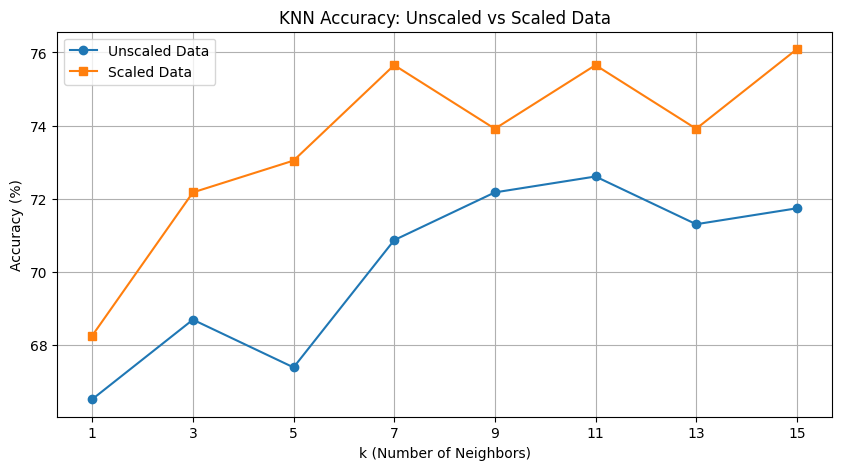

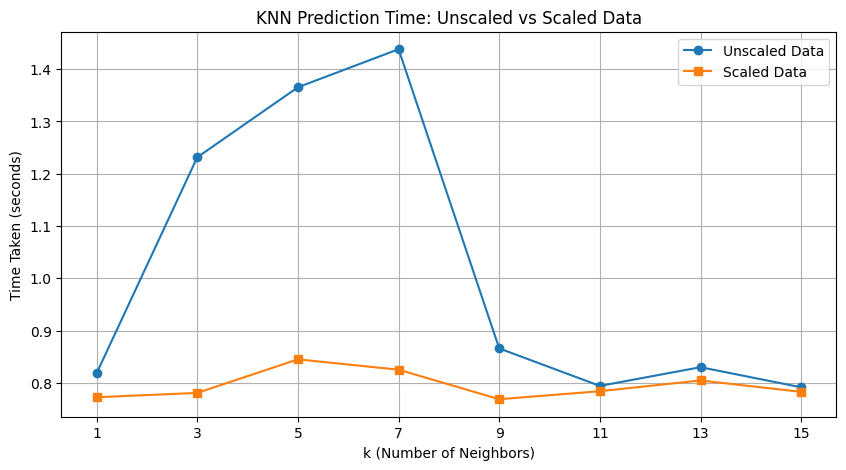

In [186]:
import time
import matplotlib.pyplot as plt

# --- k values ---
k_values = range(1, 16, 2)  # 1, 3, 5, ..., 15

# --- Lists to store results ---
unscaled_acc = []
unscaled_time = []

scaled_acc = []
scaled_time = []

# --- KNN on unscaled data ---
for k in k_values:
    start_time = time.time()
    y_pred = knn_predict(X_test, X_train, y_train, k=k)
    end_time = time.time()

    acc = compute_accuracy(y_test, y_pred)
    unscaled_acc.append(acc)

    time_taken = end_time - start_time
    unscaled_time.append(time_taken)

    print(f"[Unscaled] k={k} | Accuracy={acc:.2f}% | Time={time_taken:.5f}s")

# --- KNN on scaled data ---
for k in k_values:
    start_time = time.time()
    y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=k)
    end_time = time.time()

    acc_scaled = compute_accuracy(y_test, y_pred_scaled)
    scaled_acc.append(acc_scaled)

    time_taken_scaled = end_time - start_time
    scaled_time.append(time_taken_scaled)

    print(f"[Scaled] k={k} | Accuracy={acc_scaled:.2f}% | Time={time_taken_scaled:.5f}s")

# --- Plot Accuracy ---
plt.figure(figsize=(10,5))
plt.plot(k_values, unscaled_acc, marker='o', label='Unscaled Data')
plt.plot(k_values, scaled_acc, marker='s', label='Scaled Data')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('KNN Accuracy: Unscaled vs Scaled Data')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# --- Plot Time Taken ---
plt.figure(figsize=(10,5))
plt.plot(k_values, unscaled_time, marker='o', label='Unscaled Data')
plt.plot(k_values, scaled_time, marker='s', label='Scaled Data')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.title('KNN Prediction Time: Unscaled vs Scaled Data')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()


Small k values (like 1–3) are very sensitive to noise, so the predictions are often less accurate. As k increases, the accuracy improves, and an often good choice is around the square root of the number of rows in the dataset.


KNN calculates distance from the query point to all training points.
Larger k does not significantly affect computation per query, but choosing many neighbors means more data to process for voting.

From the graph, for the scaled dataset, the best k was 11, while for the unscaled dataset, it was 15.


# challenges of using KNN for large datasets and high-dimensional data.
  -for each query it calculates distance to all  training points so it  uses high computational power.
  -in higher dimention  euclideandistance looses meaning (curse of dimensionality)

  -all training data is loaded in th ememory

  


Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
reduction).
-Approximate Nearest Neighbors (ANN): Instead of comparing a query with all training points, ANN reduces the search space using methods like KD-Trees, Ball-Trees, or Locality-Sensitive Hashing. This speeds up KNN, especially for large datasets, by only checking likely neighbors.

Dimensionality Reduction: High-dimensional data slows KNN, so techniques like PCA or t-SNE reduce features while preserving important information. Fewer dimensions make distance calculations faster and can improve accuracy by removing noise.

Sampling / Reduced Training Set: Using a smaller, representative subset of training data speeds up KNN predictions. This is useful for large datasets but may slightly reduce accuracy if the sample is not well-chosen.

Distance-weighted Voting: Instead of simple majority voting, neighbors are weighted by inverse distance. Closer neighbors have more influence on the prediction, making KNN more accurate when neighbors are unevenly distributed.